<a href="https://colab.research.google.com/github/MarwaFA21/Marwa-Code/blob/main/Assessment_1_Marwa_Fadlila_Amalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis

Data yang digunakan: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

Data yang disediakan dalam dataset ini merupakan data yang terkait dengan perubahan iklim dan suhu global. Data ini merupakan hasil kompilasi oleh Berkeley Earth Surface Temperature Study yang menggabungkan lebih dari 1,6 miliar laporan suhu dari 16 arsip sebelumnya. Data ini dapat digunakan untuk menganalisis tren perubahan iklim dan suhu global dari waktu ke waktu, serta untuk memahami variasi dan ketidakpastian dalam data tersebut. Data tersebut mencakup beberapa jenis informasi. Di assessment 1 ini, saya memilih 1 file data dengan judul Global Average Land Temperatur by State (GlobalLandTemperaturesByState.csv) yang di dalamnya berisi suhu rata-rata daratan global berdasarkan negara bagian.

#Checkpoint 1

In [ ]:
import numpy as np #operasi numerik
import pandas as pd #data frame
import matplotlib.pyplot as plt #memvisualisasi data, membuat grafik dasar
import seaborn as sns #memvisualisasi data, membuat grafik lengkap
import plotly.express as px

#Import Data

In [ ]:
#mengimpor data
from google.colab import files
uploades = files.upload()

Saving GlobalLandTemperaturesByState.csv to GlobalLandTemperaturesByState.csv


In [ ]:
#memanggil data
df = pd.read_csv('GlobalLandTemperaturesByState.csv',sep=",")
df.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
5,1855-10-01,25.442,1.179,Acre,Brazil
6,1855-11-01,25.400,1.064,Acre,Brazil
7,1855-12-01,24.100,1.718,Acre,Brazil
8,1856-01-01,25.814,1.159,Acre,Brazil
9,1856-02-01,24.658,1.147,Acre,Brazil


In [ ]:
#mengecek informasi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [ ]:
#mengubah tipe date dari object ke date
df = pd.read_csv('GlobalLandTemperaturesByState.csv',parse_dates=['dt'])
df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
State                                    object
Country                                  object
dtype: object

#Filter Data

In [ ]:
#mengambil sebagian data dari tahun 2008
df_lim = df[df.dt >= '2008-01-01']
df_lim

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
1832,2008-01-01,25.750,0.318,Acre,Brazil
1833,2008-02-01,25.877,0.191,Acre,Brazil
1834,2008-03-01,25.759,0.181,Acre,Brazil
1835,2008-04-01,25.721,0.244,Acre,Brazil
1836,2008-05-01,24.882,0.285,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


#Cleaning Dataset

In [ ]:
#melihat apakah terdapat missing value atau tidak
df.isnull().any()

dt                               False
AverageTemperature                True
AverageTemperatureUncertainty     True
State                            False
Country                          False
dtype: bool

In [ ]:
#melihat berapa banyak missing value nya
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [ ]:
#mencari rata-rata perbulan pada data average temperature dari tahun 2008-2013 untuk mengganti missing value
df_lim.loc[:,'month'] = df_lim['dt'].dt.month
average_tmp_imp = df_lim.groupby(['State','month'])['AverageTemperature'].mean().to_dict()

<ipython-input-9-964d364dfcfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim.loc[:,'month'] = df_lim['dt'].dt.month


In [ ]:
#mencari rata-rata perbulan average temperature uncertainty dari tahun 2008-2013 untuk mengganti missing value
df_lim.loc[:,'month'] = df_lim['dt'].dt.month
average_tmp_imp = df_lim.groupby(['State','month'])['AverageTemperatureUncertainty'].mean().to_dict()

<ipython-input-10-2bbce8ab78a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim.loc[:,'month'] = df_lim['dt'].dt.month


In [ ]:
#menginput missing value
df_lim.loc[:,'AverageTemperature'] = df_lim.apply(lambda x: average_tmp_imp[(x['State'],x['month'])] if np.isnan(x['AverageTemperature']) else x['AverageTemperature'],axis=1)
df_lim.loc[:,'AverageTemperatureUncertainty'] = df_lim.apply(lambda x: average_tmp_imp[(x['State'],x['month'])] if np.isnan(x['AverageTemperatureUncertainty']) else x['AverageTemperatureUncertainty'],axis=1)

<ipython-input-11-46e494cb465a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim.loc[:,'AverageTemperature'] = df_lim.apply(lambda x: average_tmp_imp[(x['State'],x['month'])] if np.isnan(x['AverageTemperature']) else x['AverageTemperature'],axis=1)
<ipython-input-11-46e494cb465a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim.loc[:,'AverageTemperatureUncertainty'] = df_lim.apply(lambda x: average_tmp_imp[(x['State'],x['month'])] if np.isnan(x['AverageTemperatureUncertainty']) else x['Average

#Case 1: Tipe data apa yang kita punya?

In [ ]:
#melihat jumlah data numerik dan kategorik
num_cols = df_lim._get_numeric_data().columns
cat_cols = list(set(df_lim.columns) - set(num_cols))
print("Numerical columns: ",num_cols)
print("Categorical columns: ",cat_cols)

Numerical columns:  Index(['AverageTemperature', 'AverageTemperatureUncertainty', 'month'], dtype='object')
Categorical columns:  ['dt', 'State', 'Country']


#Case 2: Negara mana yang memiliki suhu maksimum?

In [ ]:
#membuat barplot secara vertikal
from plotly.graph_objs import ColorBar
df_tmp = df_lim.groupby("Country")['AverageTemperature'].max().to_frame().reset_index()
px.bar(df_tmp, y='AverageTemperature', x='Country', title='Maximum average temperature by country')

In [ ]:
#membuat barplot secara horizontal
df_tmp = df_lim.groupby("Country")['AverageTemperature'].max().to_frame().reset_index()
px.bar(df_tmp, y='Country', x='AverageTemperature', title='Maximum average temperature by country')

Berdasarkan hasil running barplot di atas, baik secara vertikal maupun horizontal, didapatkan kesimpulan bahwa negara yang memiliki suhu maksimum tertinggi adalah India. India memiliki average temperature 36,339 derajat Celcius. Selanjutnya ada negara Australia (32,214 derajat Celcius), United States (32,2 derajat Celcius), China (30,02 derajat Celcius), Russia (29,501 derajat Celcius), Brazil (29,431 derajat Celcius), dan terakhir ada Canada (20,603 derajat Celcius).

#Case 3: Bagaimana bentuk plot distribusi average temperature di Negara India?

In [ ]:
#menampilkan average temperature di Negara India
df_lim_India = df_lim[df_lim['Country'] == "India"]
df_lim_India

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,month
27253,2008-01-01,27.4230,0.2390,Andaman And Nicobar,India,1
27254,2008-02-01,27.5720,0.2110,Andaman And Nicobar,India,2
27255,2008-03-01,27.7720,0.2630,Andaman And Nicobar,India,3
27256,2008-04-01,28.2450,0.6660,Andaman And Nicobar,India,4
27257,2008-05-01,28.0330,0.6020,Andaman And Nicobar,India,5
...,...,...,...,...,...,...
615157,2013-05-01,29.6940,0.2700,West Bengal,India,5
615158,2013-06-01,29.6280,0.4650,West Bengal,India,6
615159,2013-07-01,29.1150,0.3590,West Bengal,India,7
615160,2013-08-01,28.6860,0.3040,West Bengal,India,8


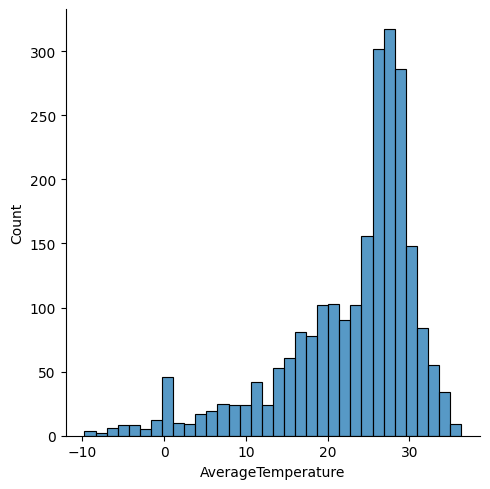

In [ ]:
#membuat distplot
#plot distribusi
sns.displot(df_lim_India['AverageTemperature'])

Berdasarkan distribusi plot yang diperoleh, dapat disimpulkan bahwa suhu rata-rata di Negara India memiliki rentang sekitar 26 hingga 30 derajat Celsius. Ini menunjukkan bahwa suhu rata-rata di Negara India cenderung berkisar antara nilai tersebut dari sebagian besar data suhu terkumpul di dalam rentang ini. Rentang ini dapat dianggap sebagai rentang suhu yang paling umum atau biasa terjadi di Negara India. Namun, perlu diingat bahwa ada variasi dalam suhu rata-rata di luar rentang ini, dan terkadang suhu bisa lebih tinggi atau lebih rendah daripada rentang tersebut dalam periode tertentu.

#Checkpoint 2

#Case 4: Bagaimana bentuk box plot suhu di berbagai negara?

In [ ]:
#membuat boxplot
px.box(df_lim,x = 'Country',y = 'AverageTemperature',title = 'Temperature in Each Country')

Berdasarkan box plot diatas, dapat di lihat jika sudah terdapat informasi yang lengkap mengenai suhu pada masing-masing negara. Selain itu, juga terdapat informasi mengenai suhu maksimum, kuartil atas (Q3), median, kuartil bawah (Q1), suhu minimum, rentang suhu, dan suhu rata-rata di masing-masing negara. Untuk detail masing-masing nilainya sendiri dapat dilihat dengan mengarahkan kursor pada gambar box plot negara-negara tersebut.


#Case 5: Berapa proporsi average temperature Negara India yang berada di atas atau di bawah rata-rata sesungguhnya?

In [ ]:
#mencari seluruh rata-rata average temperature
df_lim.groupby('Country')['AverageTemperature'].mean()

Country
Australia        18.245654
Brazil           24.342697
Canada            0.060314
China            12.226263
India            22.841945
Russia            2.993038
United States    11.899499
Name: AverageTemperature, dtype: float64

In [ ]:
dict_average_tmp = df_lim.groupby('Country')['AverageTemperature'].mean().to_dict()
dict_average_tmp

{'Australia': 18.24565434782609,
 'Brazil': 24.342697463768115,
 'Canada': 0.06031449275362306,
 'China': 12.226263020102852,
 'India': 22.841944586530264,
 'Russia': 2.993038104543234,
 'United States': 11.899498607558964}

In [ ]:
#membuat piechart
df_lim_case5 = df_lim.copy()
df_lim_case5.loc[:,'lower'] = df_lim_case5.apply(lambda x: "lower than average" if x['AverageTemperature'] < dict_average_tmp[x['Country']] else "Higher than average",axis=1)
df_lim_case5_aus = df_lim_case5[df_lim_case5.Country == 'India']
px.pie(df_lim_case5_aus, names='lower', title='Proportion of months with temperature lower than average')
#edit legend values
fig = px.pie(df_lim_case5_aus, names='lower', title='Proportion of months with temperature lower or higher than average in India')
fig.show()

Berdasarkan pie chart di atas, dapat dilihat bahwa proporsi suhu rata-rata di Negara India yang berada di atas rata-rata sesungguhnya adalah 63,4% dan yang berada di bawah rata-rata sesungguhnya adalah 36,6%. Hal ini menunjukkan bahwa sebagian besar waktu, suhu di Negara India cenderung lebih tinggi daripada rata-rata sesungguhnya. Akan tetapi meskipun sebagian besar waktu suhu di atas rata-rata, ada juga periode-periode tertentu di mana suhu di India bisa di bawah rata-rata sesungguhnya.

#Case 6: Bagaimana bentuk korelasi antara average temperature dengan average temperature uncertainty?

In [ ]:
#membuat scatterplot
df_lim_case6 = df_lim.copy()
px.scatter(df_lim_case6, x='AverageTemperature', y='AverageTemperatureUncertainty', title='Correlation between AverageTemperature and AverageTemperatureUncertainty')

Berdasarkan grafik yang telah diperoleh, dapat dilihat bahwa terdapat korelasi antara suhu rata-rata dan ketidakpastian suhu rata-rata. Hal ini terlihat dari bentuk bentuk plot nya saling bergerombol antara satu dengan lainnya.